In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import LearningRateScheduler,TerminateOnNaN, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

In [2]:
DATA_FOLDER = "../Data"

ATT_FILE = f"{DATA_FOLDER}/FootballPlayerPreparedCleanAttributes.csv"
IMPUTED_ATT_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/FootballPlayerOneHotEncodedClasses.csv"
IMPUTED_ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerOneHotEncodedClasses.csv"

In [3]:
IMPUTED_DATA = True    # Use imputed dataset
TRAIN_RATE = 0.8        # The division of the data for training, validation and test

In [4]:
if IMPUTED_DATA:
    attributes = pd.read_csv(IMPUTED_ATT_FILE)
    labels = pd.read_csv(IMPUTED_ONE_HOT_LABEL_FILE)
else:
    attributes = pd.read_csv(ATT_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_FILE)

n_total_instances = attributes.shape[0]
n_train_instances = int(n_total_instances * TRAIN_RATE)
n_dev_instances = int((n_total_instances - n_train_instances)/2)

instances_test = attributes.values[n_train_instances + n_dev_instances: n_train_instances + n_dev_instances + n_dev_instances]
labels_test = labels.values[n_train_instances + n_dev_instances: n_train_instances + n_dev_instances + n_dev_instances]

In [5]:
if IMPUTED_DATA:
    my_model = keras.models.load_model("../Models/final-1.h5")
else:
    my_model = keras.models.load_model("../Models/final-2.h5")

In [6]:
def draw_confusion_matrix(cm, categories, normalize=True):
    # Draw confusion matrix
    fig = plt.figure(figsize=[3*pow(len(categories), 0.5), 2*pow(len(categories), 0.5)])
    ax = fig.add_subplot(111)
    if normalize:
        cm = cm.astype('float') / np.maximum(cm.sum(axis=1)[:, np.newaxis], np.finfo(np.float64).eps)
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.get_cmap('Blues'))
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=categories, yticklabels=categories, ylabel='Annotation', xlabel='Prediction')
    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center", color="white" if cm[i, j] > thresh else "black", fontsize=int(12-pow(len(categories), 0.5)))
    fig.tight_layout()
    plt.show(fig)


51/51 [==============================] - 1s 2ms/step


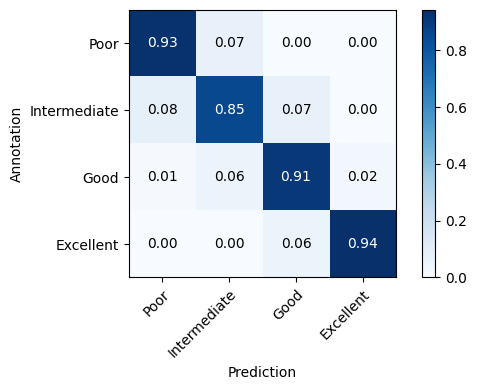

In [7]:
labels_pred = my_model.predict(instances_test)
cm = confusion_matrix(np.argmax(labels_test, axis=1), np.argmax(labels_pred, axis=1))
draw_confusion_matrix(cm, ["Poor", "Intermediate", "Good", "Excellent"])

In [8]:
print("Accuracy:", accuracy_score(np.argmax(labels_test, axis=1), np.argmax(labels_pred, axis=1)))

Accuracy: 0.9085290482076638
